# Discriminant analysis 

- its a generative model becouse starts from the assumption of the ccd and the prior probability 

 ## Gaussian Classifiers.
 
 its assume that the ccd is gaussian. The desition boundary are quadratic, if classes share the same covariance the desitioon boundary is linear and the belowned class is the class that have less distance to the mean, or minimize the mahalanobis distance. 
 
 if all covariance matrix are diagonal, we get the  bayes classifier 
 
 if all cov matrix are the identity then we get NN Classifier 
 


# FISHER LDA

Its a reduction tecnique and a clasification method


The general LDA approach is very similar to a Principal Component Analysis. But in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA). 


Taken from https://goelhardik.github.io/2016/10/04/fishers-lda/


If we project the 2-D data points onto a line (1-D), out of all such lines, our goal is to find the one which maximizes the distance between the means of the 2 classes, after projection. If we could do that, we could achieve a good separation between the classes in 1-D. This is illustrated in the figure on the left and can be captured in the idea of maximizing the "between class covariance". However, as we can see that this causes a lot of overlap between the projected classes. We want to minimize this overlap as well. To handle this, Fisher’s LDA tries to minimize the "within-class covariance" of each class. Minimizing this covariance leads us to the projection in the figure on the right hand side, which has minimal overlap. Formalizing this, we can represent the objective as follows.

$$J(w) = \frac{w^{\mathsf{T}}S_{b}w}{w^{\mathsf{T}}S_{w}w}$$

where 

$$ \(S_{b} \in \mathbb{R}^{d \times d}\) $$ and  $$\(S_{w} \in \mathbb{R}^{d \times d}\)$$
are the between-class and within-class covariance matrices, respectively. They are calculated as

$$S_{b} = \sum_{k = 1}^K (m_{k} - m)N_{k}(m_{k} - m)^{\mathsf{T}}$$

$$S_{w} = \sum_{k = 1}^K \sum_{n = 1}^{N_{k}} (X_{nk} - m_{k})(X_{nk} - m_{k})^{\mathsf{T}}$$
$$
where \(X_{nk}\) is the \(n\)th data example in the \(k\)th class, \(N_{k}\) is the number of examples in class \(k\), \(m\) is the overall mean of the entire data and \(m_{k}\) is the mean of the \(k\)th class. Now using Lagrangian dual and the KKT conditions, the problem of maximizing \(J\) can be transformed into the solution

$$S_{w}^{-1}S_{b}w = \lambda w$$

which is an eigenvalue problem for the matrix  $\(S_{w}^{-1}S_{b}\)$. Thus our final solution for \(w\) will be the eigenvectors of the above equation, corresponding to the largest eigenvalues. For reduction to \(d^{\prime}\) dimensions, we take the $$\(d^{\prime}\)$$ largest eigenvalues as they will contain the most information. Also, note that if we have \(K\) classes, the maximum value of \(d^{\prime}\) can be \(K - 1\). That is, we cannot project \(K\) class data to a dimension greater than \(K - 1\). (Of course, \(d^{\prime}\) cannot be greater than the original data dimension \(d\)). This is because of the following reason. Note that the between-class scatter matrix, \(S_{b}\) was a sum of \(K\) matrices, each of which is of rank 1, being an outer product of two vectors.

Also, because the overall mean and the individual class means are related, only (\(K - 1\)) of these \(K\) matrices are independent. Thus \(S_{b}\) has a maximum rank of \(K - 1\) and hence there are only \(K - 1\) non-zero eigenvalues. Thus we are unable to project the data to more than \(K - 1\) dimensions. $$


https://medium.com/journey-2-artificial-intelligence/lda-linear-discriminant-analysis-using-python-2155cf5b6398


Compute d-dimensional mean vectors for different classes from the dataset, where d is the dimension of feature space.
Compute in-between class and with-in class scatter matrices.
Compute eigen vectors and corresponding eigen values for the scatter matrices.
Choose k eigen vectors corresponding to top k eigen values to form a transformation matrix of dimension d x k.
Transform the d-dimensional feature space X to k-dimensional feature space X_lda via the transformation matrix.


## Unlike PCA, standardization of the data is not needed in LDA as it doesn’t affect the output.


LDA uses the fisher ratio that maximice the diference betwen classses and minimice the variances 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

In [2]:
df.head()

,var,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.describe()

,var,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


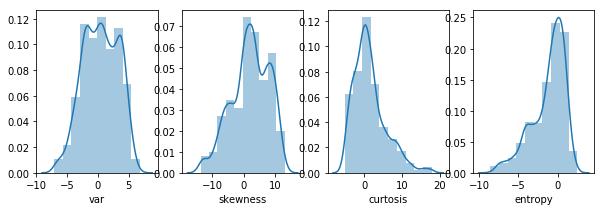

In [4]:
f, ax = plt.subplots(1, 4, figsize=(10,3))
vis1 = sns.distplot(df["var"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["skewness"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["curtosis"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["entropy"],bins=10, ax=ax[3])
f.savefig('subplot.png')

In [6]:
mean_vec = []
for i in df["class"].unique():
    mean_vec.append( np.array((df[df["class"]==i].mean()[:4]) ))
print(mean_vec)

[array([ 2.27668601,  4.25662719,  0.79671797, -1.14764028]), array([-1.86844256, -0.99357612,  2.14827101, -1.24664075])]


In [87]:
#with-in class scatter matrices and in-between class scatter matrices.

SW = np.zeros((4,4))
for i in range(0,2): #2 is number of classes
    per_class_sc_mat = np.zeros((4,4))
    for j in range(df[df["class"]==i].shape[0]):
        row, mv = df.loc[j][:4].values.reshape(4,1), mean_vec[i].reshape(4,1)
        per_class_sc_mat += (row-mv).dot((row-mv).T)
    SW += per_class_sc_mat
print('within-class Scatter Matrix:\n', SW)
overall_mean = np.array(df.drop("class", axis=1).mean())
SB = np.zeros((4,4))

for i in range(2): #2 is number of classes
    n = df[df["class"]==i].shape[0]
    mv = mean_vec[i].reshape(4,1)
    overall_mean = overall_mean.reshape(4,1) # make column vector
    SB += n * (mv - overall_mean).dot((mv - overall_mean).T)
print('between-class Scatter Matrix:\n', SB)



within-class Scatter Matrix:
 [[ 15997.20680745  10598.25435322  -6668.5770038    2469.78109368]
 [ 10598.25435322  54273.08971098 -22017.11039567 -10180.9224334 ]
 [ -6668.5770038  -22017.11039567  15846.9785222    3996.1409538 ]
 [  2469.78109368 -10180.9224334    3996.1409538    6313.46245398]]
between-class Scatter Matrix:
 [[ 5.82112206e+03  7.37300999e+03 -1.89802442e+03  1.39029178e+02]
 [ 7.37300999e+03  9.33862504e+03 -2.40403016e+03  1.76093803e+02]
 [-1.89802442e+03 -2.40403016e+03  6.18866372e+02 -4.53315997e+01]
 [ 1.39029178e+02  1.76093803e+02 -4.53315997e+01  3.32051315e+00]]


In [86]:
e_vals, e_vecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

between-class Scatter Matrix:
 [[ 3.75148406e+04  4.75161474e+04 -1.22320203e+04  8.95988333e+02]
 [ 4.75161474e+04  6.01837629e+04 -1.54930282e+04  1.13485525e+03]
 [-1.22320203e+04 -1.54930282e+04  3.98835019e+03 -2.92144318e+02]
 [ 8.95988333e+02  1.13485525e+03 -2.92144318e+02  2.13994004e+01]]


In [88]:
np.linalg.inv(SW).dot(SB)

array([[ 3.69111231e-01,  4.67514813e-01, -1.20351733e-01,
         8.81569404e-03],
       [ 1.75406616e-01,  2.22169320e-01, -5.71927604e-02,
         4.18933624e-03],
       [ 2.84139392e-01,  3.59889820e-01, -9.26459707e-02,
         6.78626315e-03],
       [-1.93641248e-02, -2.45265233e-02,  6.31383114e-03,
        -4.62484437e-04]])

In [89]:
W = np.hstack((e_pairs[0][1].reshape(4,1), e_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)


NameError: name 'e_pairs' is not defined

array([[ 5.27764256],
       [ 6.39847612],
       [-4.67107101],
       [ 0.34706075]])